# Financial Services Use In Tanzania


In [52]:
# loading modules
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [53]:
# reading csv
mob_mon= pd.read_csv('resources/training.csv')
mob_mon.info()

#missing values
missing_values = mob_mon.isnull().sum().sum()
print('\nNumber of missing values:',missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

#### 2. Get basic descriptive statistics for the dataset.

In [74]:
# Renaming all columns I am required to work with.

mob_mon = mob_mon.rename(columns={'Q1':'age','Q2':'gender','Q3':'marital_status','Q6':'land_ownership'})


mob_mon_incomes = mob_mon[["Q8_1" ,"Q8_2","Q8_3","Q8_4","Q8_5","Q8_6","Q8_7","Q8_8","Q8_9","Q8_10","Q8_11"]] 

income_type = {
    "Q8_1":'Salaries/wages',
    "Q8_2":'trading/selling',
    "Q8_3":'service',
    "Q8_4":'Piece work/Casual labor/Occasional jobs',
    "Q8_5":'Rental income',
    "Q8_6":'Interest',
    "Q8_7":'Pension',
    "Q8_8":'Social welfare money/grant from Government',
    "Q8_9":'Rely on someone',
    "Q8_10":'Don’t get money',
    "Q8_11": 'Other'
}

A = np.linspace(2.0, 10.0, num=11)
B = ['Salaries/wages',
'trading/selling',
'service',
'Piece work/Casual labor/Occasional jobs',
'Rental income',
'Interest',
'Pension',
'Social welfare money/grant from Government',
'Rely on someone',
'Don’t get money',
'Other']
d = {'numeric': A, 'categorical': B}
df = pd.DataFrame(d)
df['categorical'] = pd.Categorical(df['categorical'])

In [76]:
mob_mon.head()

,age,gender,marital_status,Q4,Q5,land_ownership,Q7,Q8_1,Q8_2,Q8_3,...,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,Age_by_decades,income type
0,98,female,3,1,1,2,2,0,0,0,...,4,-4.460442,29.811396,0,0,0,0,0,90,[Rely on someone]
1,40,male,1,3,5,1,1,1,0,0,...,4,-6.176438,39.244871,1,1,1,0,3,40,[Salaries/wages]
2,18,female,4,6,3,2,1,0,0,0,...,1,-6.825702,37.652798,1,0,0,0,2,10,[Rely on someone]
3,50,male,1,3,1,1,1,0,0,0,...,4,-3.372049,35.808307,1,0,1,0,3,50,[Piece work/Casual labor/Occasional jobs]
4,34,male,1,1,1,2,1,0,1,0,...,4,-7.179645,31.039095,1,1,0,1,3,30,[trading/selling]


In [55]:
# Getting descriptive stats on my dataset.
mob_mon = mob_mon.drop(['ID'], axis=1)
summary = mob_mon.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
age,7094.0,38.239498,16.332148,16.0,25.0,35.0,48.0,100.0
gender,7094.0,1.559910,0.496433,1.0,1.0,2.0,2.0,2.0
marital_status,7094.0,1.787426,1.165160,1.0,1.0,1.0,3.0,4.0
Q4,7094.0,3.060051,1.557779,1.0,2.0,3.0,3.0,8.0
Q5,7094.0,2.548915,1.534257,1.0,1.0,3.0,4.0,6.0


In [56]:
# Changed values to male and female
mob_mon.gender= ['male' if each == 1 else 'female' for each in mob_mon.gender]

# Checking the number of entries for males:
males = mob_mon[mob_mon.gender == 'male']
m1 = len(males[males.mobile_money == 1])
m2 = len(males[males.mobile_money == 0]) 
m = m1 + m2
print('Total number of males:',m)
print('Males with Mobile Money:',m1)
print('Males without Mobile Money:',m2,)

# Checking the number of entries for males:
females = mob_mon[mob_mon.gender == 'female']
f1 = len(females[females.mobile_money == 1])
f2 = len(females[females.mobile_money == 0])
f = f1 + f2
print('\nTotal number of females:',f)
print('Females with Mobile Money:',f1)
print('Females without Mobile Money:',f2)

# Checking the youngest & oldest entrant in the database. 
youngest = mob_mon[mob_mon.age.notnull()].sort_values('age')[['gender','age']].head(1)
oldest = mob_mon[mob_mon.age.notnull()].sort_values('age')[['gender','age']].tail(1)

print('\nThe youngest is ', youngest.gender.values, youngest.age.values)
print('the oldest is: ', oldest.gender.values, oldest.age.values)

Total number of males: 3122
Males with Mobile Money: 1959
Males without Mobile Money: 1163

Total number of females: 3972
Females with Mobile Money: 1971
Females without Mobile Money: 2001

The youngest is  ['male'] [16]
the oldest is:  ['male'] [100]


#### 3. Create appropriate graphs to visually represent the relationship between financial services accessed (non, momible, both) and age, gender, marital status, land ownership and type of income.

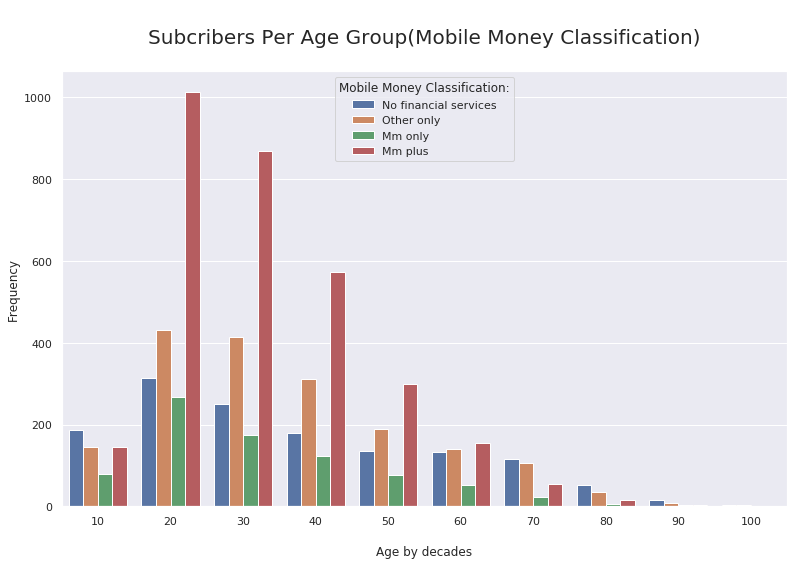

In [57]:
# Comparing Mobile Money Classification with Age.
sns.set()
mob_mon['Age_by_decades'] = mob_mon.age.apply(lambda x : int(x/10) * 10)
plt.figure(figsize = (13,8))
sns.countplot(x = 'Age_by_decades', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nSubcribers Per Age Group(Mobile Money Classification)\n',fontsize=20)
plt.xlabel('\nAge by decades')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.show()


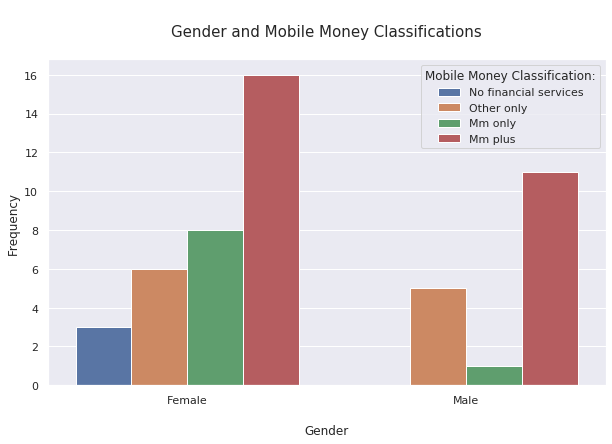

In [80]:
# Comparing Mobile Money Classification with Gender.
sns.set()
plt.figure(figsize = (10,6))
sns.countplot(x = 'gender', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nGender and Mobile Money Classifications\n', fontsize = 15)
plt.xlabel('\nGender')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(2), ['Female', 'Male'])
plt.show()

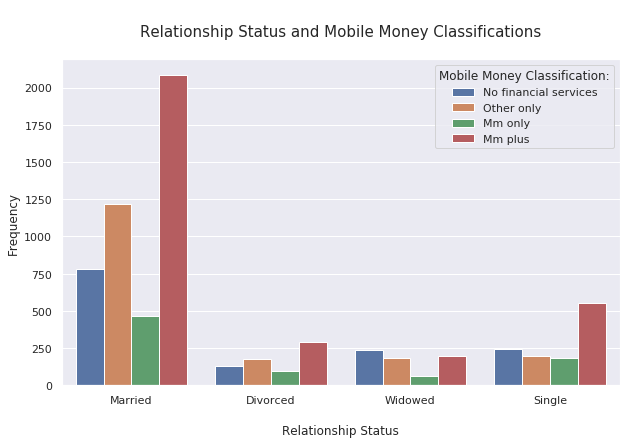

In [58]:
# Comparing Mobile Money Classification with Marital Status.

sns.set()
plt.figure(figsize = (10,6))
sns.countplot(x = 'marital_status', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nRelationship Status and Mobile Money Classifications\n', fontsize = 15)
plt.xlabel('\nRelationship Status')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(4), ['Married', 'Divorced', 'Widowed', 'Single'])
plt.show()


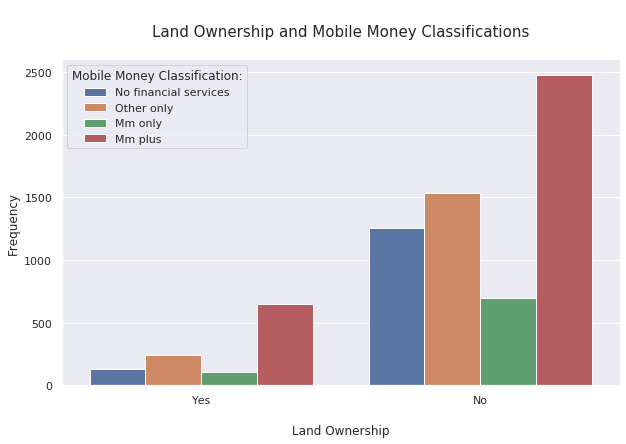

In [59]:
# Comparring Land ownership with Mobile Money Classification

sns.set()
plt.figure(figsize = (10,6))
sns.countplot(x = 'land_ownership', hue = 'mobile_money_classification',data = mob_mon)
plt.title('\nLand Ownership and Mobile Money Classifications\n', fontsize = 15)
plt.xlabel('\nLand Ownership')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(2), ['Yes', 'No'])
plt.show()


In [94]:
# Comparing Income Types and Mobile Money classifications

 mob_mon.groupby(mob_mon['income type'])['mobile_money'].sum()




# 'Salaries/wages',
# 'trading/selling',
# 'service',
# 'Piece work/Casual labor/Occasional jobs',
# 'Rental income',
# 'Interest',
# 'Pension',
# 'Social welfare money/grant from Government',
# 'Rely on someone',
# 'Don’t get money',
# 'Other']

# sns.set()
# plt.figure(figsize = (10,6))
# sns.countplot(x = 'MM', hue = 'mobile_money_classification',data = mob_mon)
# plt.title('\nType of income and Mobile Money Classifications\n', fontsize = 15)
# plt.xlabel('\nType Of Income')
# plt.ylabel('Frequency')
# plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
# plt.xticks(np.arange(2), ['Yes', 'No'])
# plt.show()
# # df_plot = df.groupby(['income type', 'mobile_money_classification']).size().reset_index().pivot(columns='income type', index='mobile_money_classification', values=0)


TypeError: unhashable type: 'list'

#### 4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.


<Figure size 7200x5040 with 0 Axes>

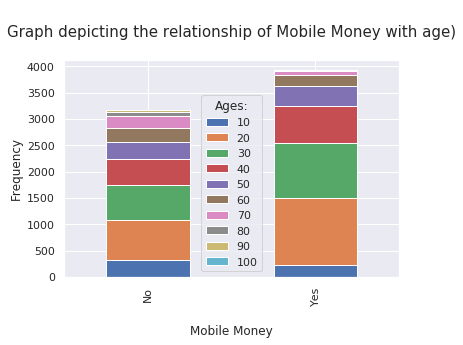

In [61]:
# Comparing Mobile Money with Age.

sns.set()
plt.figure(figsize = (100,70))
age = mob_mon.groupby(['Age_by_decades', 'mobile_money']).size().reset_index().pivot(columns='Age_by_decades', index='mobile_money', values=0)
age.plot(kind='bar', stacked=True)
plt.title('\nGraph depicting the relationship of Mobile Money with age)\n',fontsize=15)
plt.xlabel('\nMobile Money')
plt.ylabel('Frequency')
plt.legend(title = 'Ages:',loc = 'best')
plt.xticks(np.arange(2), ['No','Yes'])
plt.show()


<Figure size 720x432 with 0 Axes>

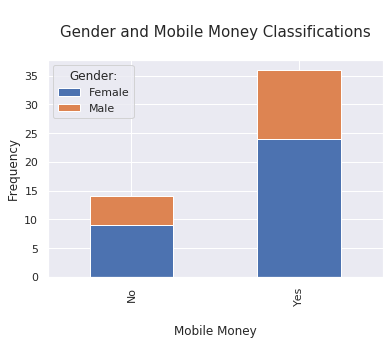

In [83]:
# Comparing Mobile Money with Gender.
sns.set()
plt.figure(figsize = (10,6))
age = mob_mon.groupby(['gender', 'mobile_money']).size().reset_index().pivot(columns='gender', index='mobile_money', values=0)
age.plot(kind='bar', stacked=True)
plt.title('\nGender and Mobile Money Classifications\n', fontsize = 15)
plt.xlabel('\nMobile Money')
plt.ylabel('Frequency')
plt.legend(title = 'Gender:', labels = ['Female', 'Male'])
plt.xticks(np.arange(2), ['No','Yes', ])
plt.show()

<Figure size 7200x5040 with 0 Axes>

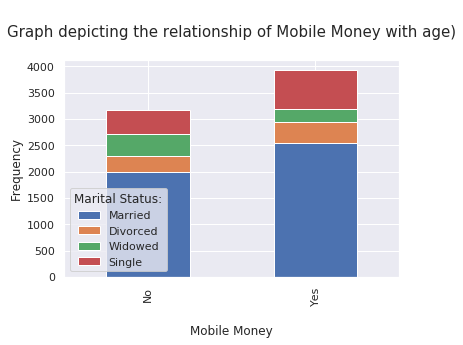

In [62]:
# Comparing Mobile Money with Relationship Status.
sns.set()
plt.figure(figsize = (100,70))
marital = mob_mon.groupby(['marital_status', 'mobile_money']).size().reset_index().pivot(columns='marital_status', index='mobile_money', values=0)
marital.plot(kind='bar', stacked=True)
plt.title('\nGraph depicting the relationship of Mobile Money with age)\n',fontsize=15)
plt.xlabel('\nMobile Money')
plt.ylabel('Frequency')
plt.legend(title = 'Marital Status:',labels=['Married', 'Divorced', 'Widowed', 'Single'],loc = 'best')
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.show()


<Figure size 720x432 with 0 Axes>

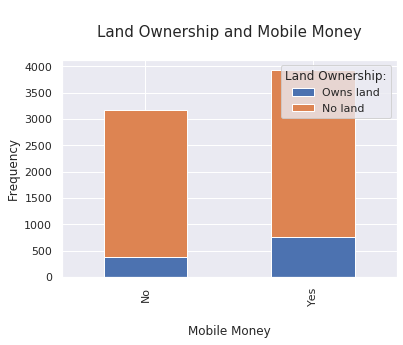

In [63]:
# Comparring Land ownership with Mobile Money

sns.set()
plt.figure(figsize = (10,6))
land = mob_mon.groupby(['land_ownership', 'mobile_money']).size().reset_index().pivot(columns='land_ownership', index='mobile_money', values=0)
land.plot(kind='bar', stacked=True)
plt.title('\nLand Ownership and Mobile Money\n', fontsize = 15)
plt.xlabel('\nMobile Money')
plt.ylabel('Frequency')
plt.xticks(np.arange(2), ['No','Yes', ])
plt.legend(title = 'Land Ownership:',labels=['Owns land', 'No land'],loc = 'best')
plt.show()


In [64]:
# Comparing Income Type and Mobile Money

#### 5. What can you conclude about use of financial services in Tanzania? Which demographic factors are associated with mobile money use?

In [65]:
for column,label in income_type.items():
    mob_mon_incomes[column] = [label if each ==1 else 'none' for each in mob_mon_incomes[column]]
mob_mon_incomes.head(1)

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11
0,none,none,none,none,none,none,none,none,Rely on someone,none,none


In [66]:
x = [1,2,3,2,2,2,3,4]
def remove_none(whatever):
    return [x for x in whatever if x != "none"]

income = []
for index, row in mob_mon_incomes.iterrows():
    # this will give you a list of values in your row.
    row = list(row)

    # you want to remove all "none" values from your list.
    nfl = remove_none(row)

    # *if* your list is empty after the process of elimination, you want to append "No income".
    if len(nfl) == 0:
        nfl.append("No income")
    
    income.append(nfl)

mob_mon['income type'] = income


In [87]:
mob_mon = mob_mon.head(50)

In [88]:
import sys
#!{sys.executable} -m pip install folium --user
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

In [89]:
# Creating a map for tanzania.
lat = -6.3728253; 
lon = 34.8924826
income_type_map = folium.Map(location = [lat, lon], zoom_start = 5)
marker_cluster = MarkerCluster().add_to(income_type_map)

# add markers to map
for lat, lng, label in zip(mob_mon['Latitude'], mob_mon['Longitude'], 
                           mob_mon['income type']):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3386cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)  

income_type_map
